# MP4 - Clustering with K-means

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('../notebooks/data between 1987 and 2017.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Close SP500         7500 non-null   float64
 1   Open SP500          7500 non-null   float64
 2   High SP500          7500 non-null   float64
 3   Low SP500           7500 non-null   float64
 4   Volume SP500        7500 non-null   float64
 5   Interest Rate       7500 non-null   float64
 6   Unemployment Rate   7500 non-null   float64
 7   Inflation Rate      7500 non-null   float64
 8   CPIAUCSL            7500 non-null   float64
 9   Open RUSSELL2000    7500 non-null   float64
 10  High RUSSELL2000    7500 non-null   float64
 11  Low RUSSELL2000     7500 non-null   float64
 12  Close RUSSELL2000   7500 non-null   float64
 13  Volume RUSSELL2000  7500 non-null   float64
 14  Close Oil           7500 non-null   float64
 15  Close Gold          7500 non-null   float64
 16  Open G

In [4]:
# Drop the date column
X = df.drop(columns=['Date'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


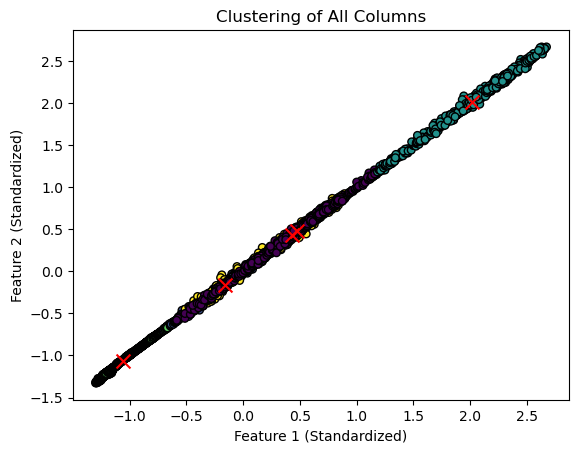

In [26]:
# Drop 'Date'-kolonnen og få kun de numeriske data
X = df.drop(columns=['Date']).values

# Standardiser dataene (anbefalet ved clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Udfør K-Means clustering på alle kolonner
kmeans = KMeans(n_clusters=5)  # Juster n_clusters efter behov
kmeans.fit(X_scaled)

# Få cluster labels og centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualiser clusteringen (kan vise 2 dimensioner ad gangen)
plt.figure()
plt.title('Clustering of All Columns')

# Visualiser med to udvalgte kolonner (f.eks. første to dimensioner)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='black', s=30)

# Plot cluster centroids (på samme skala)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100)

plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

## Determine number of clusters by Elbow method

In [13]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions = []
# We try training models for all possible number of clusters in the range and calculate their distrtion
K = range(2,10)
for k in K:
    # n_init moves the "center" 10 times. Can be set to auto
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X)
    # Take the sum of each distance between a pair (x, y) and the Kmeans center,
    # and divide it by number of rows to get the average distance.
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
# print all distortions to identify the lowest gain
print("Distortion: ", distortions)

Distortion:  [641151255.065143, 512257863.3667446, 343889715.6601495, 278598602.26340854, 241139903.49399638, 214419334.85893145, 182549567.70557663, 165225575.34087166]


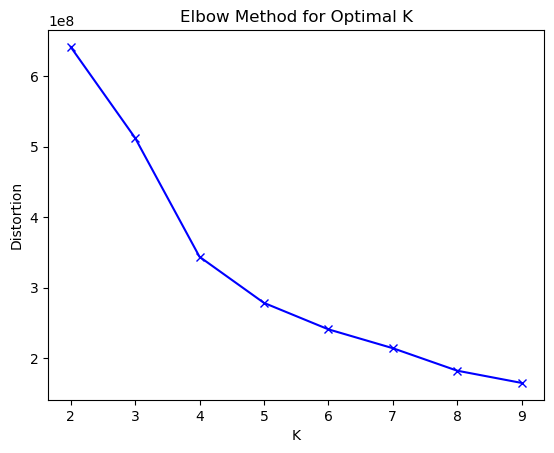

In [14]:
# Plot the distortion to discover the elbow
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

## Determine number of clusters by Silhoutte score

In [15]:
# Determine k by maximising the silhouette score for each number of clusters
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X)
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=len(X))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.7157527956413056

Number of clusters = 3
Silhouette score = 0.6807798922949315

Number of clusters = 4
Silhouette score = 0.645633168020306

Number of clusters = 5
Silhouette score = 0.6341147680453332

Number of clusters = 6
Silhouette score = 0.6384090843127734

Number of clusters = 7
Silhouette score = 0.6375285820316965

Number of clusters = 8
Silhouette score = 0.6043217675522176

Number of clusters = 9
Silhouette score = 0.6057671204509434


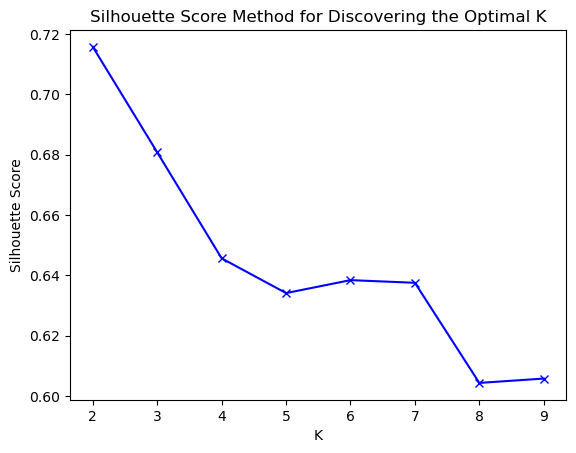

In [16]:
# Plot the elbow
plt.title('Silhouette Score Method for Discovering the Optimal K')
plt.plot(K, scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

## Train a model

In [17]:
# Optimal number of clusters K (seems to be 5)
num_clusters = 5

In [18]:
# Create an instance of KMeans classifier
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=20)
# init: method of experimemtal finding the initial location of the centroids
# n_init: the algorithm will run n_init times with different cetroids and the best result of those will be taken

In [19]:
# Train the KMeans clustering model
kmeans.fit(X)

KMeans(n_clusters=5, n_init=20)

## Implement model for prediction

In [20]:
# Predict 5 clusters in X
y = kmeans.predict(X)
y

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [21]:
# See the predicted labels of clusters
# cluster labels are stored in variable 'kmeans.labels_'
print(kmeans.labels_)

# same as print(Y)

[0 0 0 ... 2 2 2]


## Review results
First see clusters one by one

Cluster  0 :  (3136, 20)


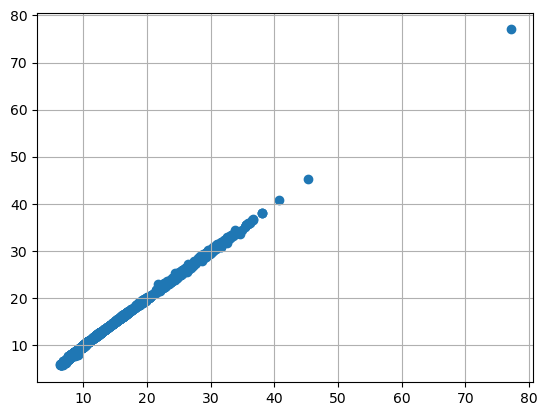

Cluster  1 :  (1068, 20)


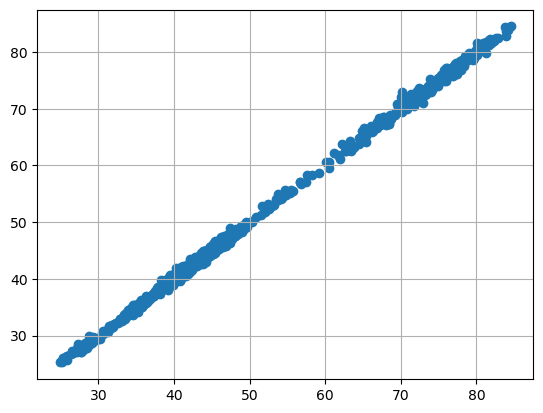

Cluster  2 :  (1382, 20)


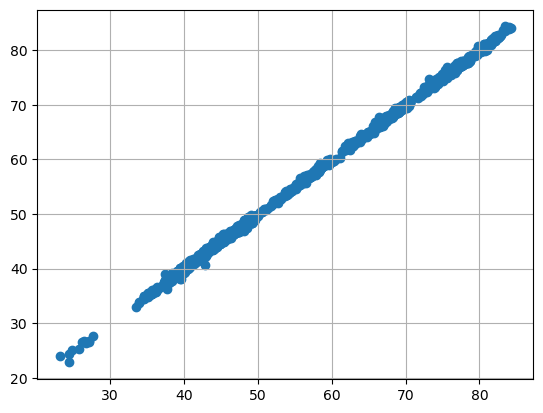

Cluster  3 :  (288, 20)


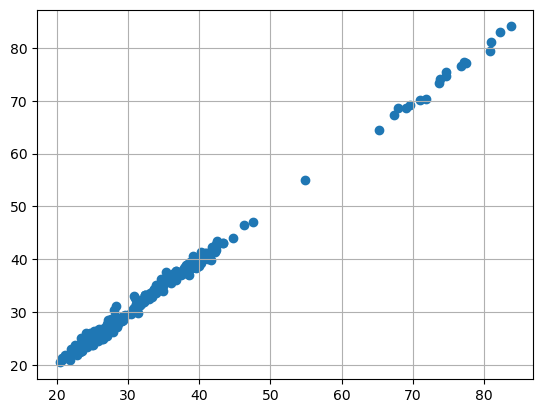

Cluster  4 :  (1626, 20)


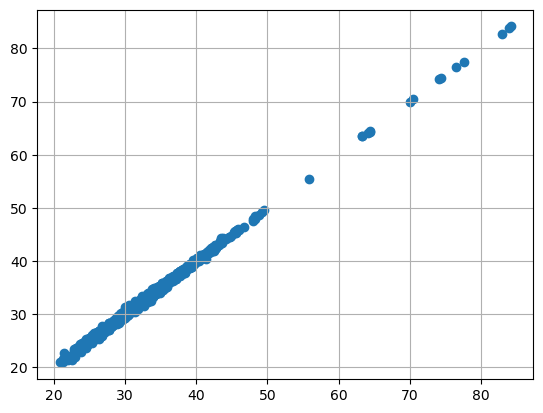

In [22]:
# Split the clusters, for demo purpose only
for i in range(num_clusters):
    # slice the cluster
    cluster = X[y == i]    
    # print the shape
    print("Cluster ", i, ": ", cluster.shape)    
    # plot the points of this cluster
    plt.scatter(cluster[:, 0], cluster[:, 1])   
    plt.grid(True)
    plt.show()

Then all clusters in one plot

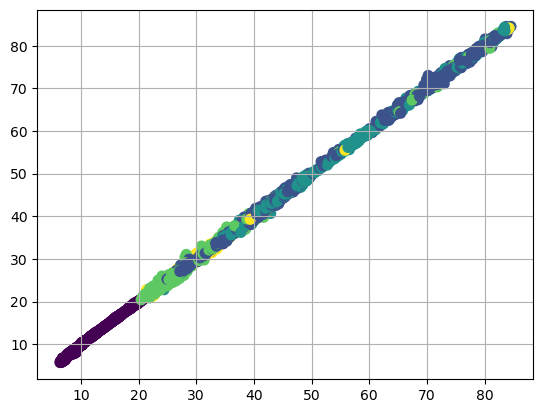

In [23]:
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

plt.grid(True)
plt.show()

In [24]:
# See the cluster centres, created during the clustering
# cluster centres are stored in a variable named 'cluster_centers_'
print(kmeans.cluster_centers_)

[[ 1.45923364e+01  1.44682426e+01  1.47578591e+01  1.44139387e+01
   3.90922701e+06  5.70190112e+00  5.71741627e+00  3.45537480e+00
   1.44692670e+02  2.64524730e+02  2.65589761e+02  2.63396472e+02
   2.64645643e+02  3.35390746e+08  1.83447943e+01  3.64108064e+02
   3.65078552e+02  3.64109707e+02  3.64101062e+02 -1.99521531e-02]
 [ 4.96150666e+01  4.96293499e+01  5.02258936e+01  4.89864816e+01
   1.00751416e+07  6.45476636e-01  7.38869159e+00  1.80196262e+00
   2.24951912e+02  8.31092447e+02  8.37880552e+02  8.23270234e+02
   8.30836421e+02  4.36612298e+09  8.47652150e+01  1.23907012e+03
   1.23907117e+03  1.25006798e+03  1.22784653e+03  1.82523364e-02]
 [ 5.62046334e+01  5.61688010e+01  5.66961518e+01  5.56552423e+01
   7.96050098e+06  1.65539855e+00  6.06210145e+00  2.02043478e+00
   2.23800166e+02  9.41956551e+02  9.47305224e+02  9.36290341e+02
   9.42527268e+02  3.10288989e+09  8.24428406e+01  1.12357372e+03
   1.12350706e+03  1.13136525e+03  1.11536369e+03  3.06811594e-02]
 [ 3.40